# **Mini Project:  Netflix Data Analysis**

***Data Loading and Preprocessing***

In [48]:
import pandas as pd
from collections import Counter

df = pd.read_csv('/netflix.csv')

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['genre_list'] = df['listed_in'].str.split(', ')
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

**I. Content Strategy**

Q1: Ratio of Movies vs TV Shows

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


Q2: Most popular genres globally

In [ ]:
genre_counter = Counter()
df['genre_list'].dropna().apply(genre_counter.update)
pd.Series(genre_counter).sort_values(ascending=False).head(10)

,0
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


Q3: Years with highest release count

In [ ]:
df['release_year'].value_counts().sort_index(ascending=True).tail(10)

,count
release_year,
2012,237
2013,288
2014,352
2015,560
2016,902
2017,1032
2018,1147
2019,1030
2020,953


Q4: Countries producing the most Netflix content

In [ ]:
country_counter = Counter()
df['country'].dropna().str.split(', ').apply(country_counter.update)
pd.Series(country_counter).sort_values(ascending=False).head(10)

,0
United States,3689
India,1046
United Kingdom,804
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226
Mexico,169


Q5: Trend of content added per year

In [ ]:
df['year_added'].value_counts().sort_index(ascending=True)

,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,10
2014.0,23
2015.0,73
2016.0,418


**II. User Demographics & Targeting**

Q6: Most frequent content ratings

In [ ]:
df['rating'].value_counts().head(10)

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


Q7: Countries producing most mature content (TV-MA)

In [ ]:
tvma_df = df[df['rating'] == 'TV-MA']
tvma_counter = Counter()
tvma_df['country'].dropna().str.split(', ').apply(tvma_counter.update)
pd.Series(tvma_counter).sort_values(ascending=False).head(10)

,0
United States,1100
India,266
United Kingdom,251
Spain,170
France,163
Canada,107
Mexico,102
Japan,101
South Korea,92
Germany,79


Q8: Genres more associated with TV Shows vs Movies

In [ ]:
movie_genres = Counter()
tv_genres = Counter()
df[df['type'] == 'Movie']['genre_list'].dropna().apply(movie_genres.update)
df[df['type'] == 'TV Show']['genre_list'].dropna().apply(tv_genres.update)
pd.Series(movie_genres).sort_values(ascending=False).head(5), pd.Series(tv_genres).sort_values(ascending=False).head(5)

(International Movies    2752
 Dramas                  2427
 Comedies                1674
 Documentaries            869
 Action & Adventure       859
 dtype: int64,
 International TV Shows    1351
 TV Dramas                  763
 TV Comedies                581
 Crime TV Shows             470
 Kids' TV                   451
 dtype: int64)

Q9: U.S. vs Other Countries - Genre Dominance

In [ ]:
us_genres = Counter()
nonus_genres = Counter()
df[df['country'].fillna('').str.contains('United States')]['genre_list'].dropna().apply(us_genres.update)
df[~df['country'].fillna('').str.contains('United States')]['genre_list'].dropna().apply(nonus_genres.update)
pd.Series(us_genres).sort_values(ascending=False).head(5), pd.Series(nonus_genres).sort_values(ascending=False).head(5)

(Dramas                      835
 Comedies                    680
 Documentaries               512
 Action & Adventure          404
 Children & Family Movies    390
 dtype: int64,
 International Movies      2586
 Dramas                    1592
 International TV Shows    1277
 Comedies                   994
 TV Dramas                  531
 dtype: int64)

Q10: Most popular genres in last 3 years

In [ ]:
latest = df['release_year'].max()
recent_genres = Counter()
df[df['release_year'] >= latest - 2]['genre_list'].dropna().apply(recent_genres.update)
pd.Series(recent_genres).sort_values(ascending=False).head(10)

,0
International Movies,662
International TV Shows,564
Dramas,530
Comedies,362
TV Dramas,343
TV Comedies,252
Documentaries,234
Crime TV Shows,226
Children & Family Movies,205
Docuseries,178


**III. Talent Acquisition & Partnerships**

Q11: Top 10 Directors

In [ ]:
df['director'].dropna().value_counts().head(10)

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


Q12: Most frequent actors

In [ ]:
cast_counter = Counter()
df['cast'].dropna().str.split(', ').apply(cast_counter.update)
pd.Series(cast_counter).sort_values(ascending=False).head(10)

,0
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29
Amitabh Bachchan,28


Q13: Frequent Director-Genre pairs

In [ ]:
from itertools import product
pair_counter = Counter()
df.dropna(subset=['director', 'genre_list']).apply(
    lambda row: pair_counter.update(product([row['director']], row['genre_list'])), axis=1)
pd.Series(pair_counter).sort_values(ascending=False).head(10)

Rajiv Chilaka           Children & Family Movies    19
Raúl Campos, Jan Suter  Stand-Up Comedy             18
Suhas Kadav             Children & Family Movies    16
Marcus Raboy            Stand-Up Comedy             15
Cathy Garcia-Molina     International Movies        13
Jay Karas               Stand-Up Comedy             13
Jay Chapman             Stand-Up Comedy             12
Youssef Chahine         Dramas                      12
                        International Movies        10
Cathy Garcia-Molina     Dramas                       9
dtype: int64

Q14: Titles with unknown directors or cast

In [ ]:
df['director'].isna().sum(), df['cast'].isna().sum()

(np.int64(2634), np.int64(825))

**IV. Duration & Engagement**

Q15: Average duration of Movies

In [ ]:
df[df['type'] == 'Movie']['duration_int'].mean()

np.float64(99.57718668407311)

Q16: Most common number of seasons (TV Shows)

In [ ]:
df[df['type'] == 'TV Show']['duration'].value_counts().head(5)

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65


Q17: Trend in movie durations over years

In [ ]:
df_movie_duration = df[df['type'] == 'Movie']
df_movie_duration.groupby('release_year')['duration_int'].mean().dropna()

,duration_int
release_year,
1942,35.000000
1943,62.666667
1944,52.000000
1945,51.333333
1946,58.000000
...,...
2017,95.535248
2018,96.185137
2019,93.466035


**V. Content Launch Strategy**

Q18: Months when most content is added

In [ ]:
df['month_added'].value_counts().sort_index()

,count
month_added,
1.0,727
2.0,557
3.0,734
4.0,759
5.0,626
6.0,724
7.0,819
8.0,749
9.0,765


Q19: Genre distribution over the years

In [ ]:
genre_year_counter = Counter()
df.dropna(subset=['genre_list', 'release_year']).apply(
    lambda row: genre_year_counter.update(product(row['genre_list'], [row['release_year']])), axis=1)
pd.Series(genre_year_counter).sort_values(ascending=False).head(10)

International Movies    2018    340
                        2017    328
                        2016    305
Dramas                  2018    304
                        2017    285
International Movies    2019    282
Dramas                  2016    265
                        2019    243
International Movies    2020    239
International TV Shows  2020    214
dtype: int64

Q20: Countries producing most content in each genre

In [ ]:
country_genre_counter = Counter()
df.dropna(subset=['country', 'genre_list']).apply(
    lambda row: country_genre_counter.update(product([c.strip() for c in row['country'].split(',')], row['genre_list'])), axis=1)
pd.Series(country_genre_counter).sort_values(ascending=False).head(10)

India          International Movies        864
United States  Dramas                      835
               Comedies                    680
India          Dramas                      662
United States  Documentaries               512
               Action & Adventure          404
               Independent Movies          390
               Children & Family Movies    390
India          Comedies                    323
United States  Thrillers                   292
dtype: int64

# **Data Visualization**

***Importing lib for data visualization***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Movie vs TV Show Distribution.

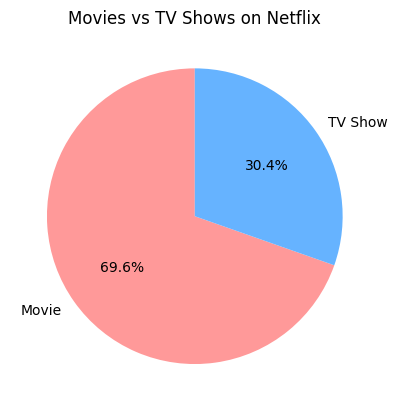

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Movies vs TV Shows on Netflix')
plt.ylabel('')
plt.show()


2. Content Added Per Year

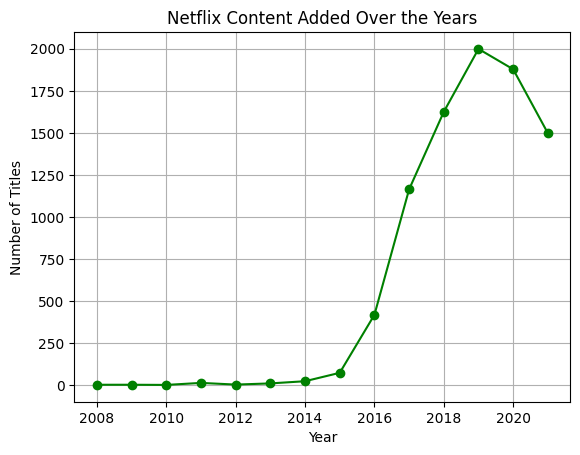

In [ ]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
content_per_year = df['year_added'].value_counts().sort_index()

plt.plot(content_per_year.index, content_per_year.values, marker='o', color='green')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


3. Top 10 Countries Producing Content

<ipython-input-39-a35d2f9c244b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.values, x=top_countries.index, palette='viridis')


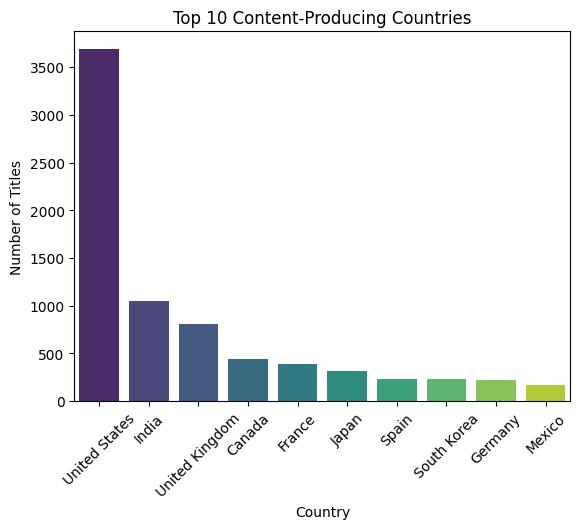

In [ ]:
sns.barplot(y=top_countries.values, x=top_countries.index, palette='viridis')
plt.title('Top 10 Content-Producing Countries')
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


4. Top 10 Genres

<ipython-input-37-45bc74be2a78>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.values, x=genre_counts.index, palette='magma')


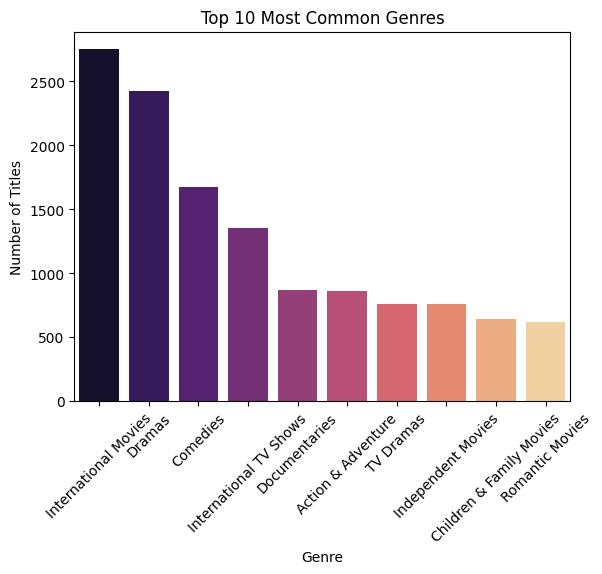

In [ ]:
sns.barplot(y=genre_counts.values, x=genre_counts.index, palette='magma')
plt.title('Top 10 Most Common Genres')
plt.ylabel('Number of Titles')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


5. Year vs Month of Content Addition

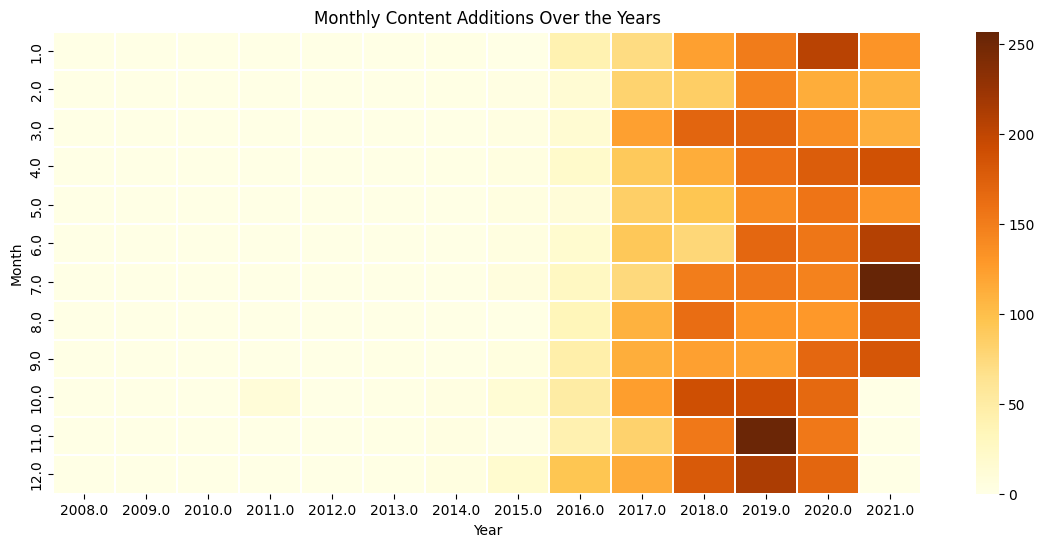

In [49]:
df['month_added'] = pd.to_datetime(df['date_added']).dt.month
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

heatmap_df = df.dropna(subset=['year_added', 'month_added'])
pivot_month_year = pd.pivot_table(
    heatmap_df,
    values='title',
    index='month_added',
    columns='year_added',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_month_year, cmap='YlOrBr', linewidths=0.3)
plt.title('Monthly Content Additions Over the Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


6. Release Date vs. Viewership

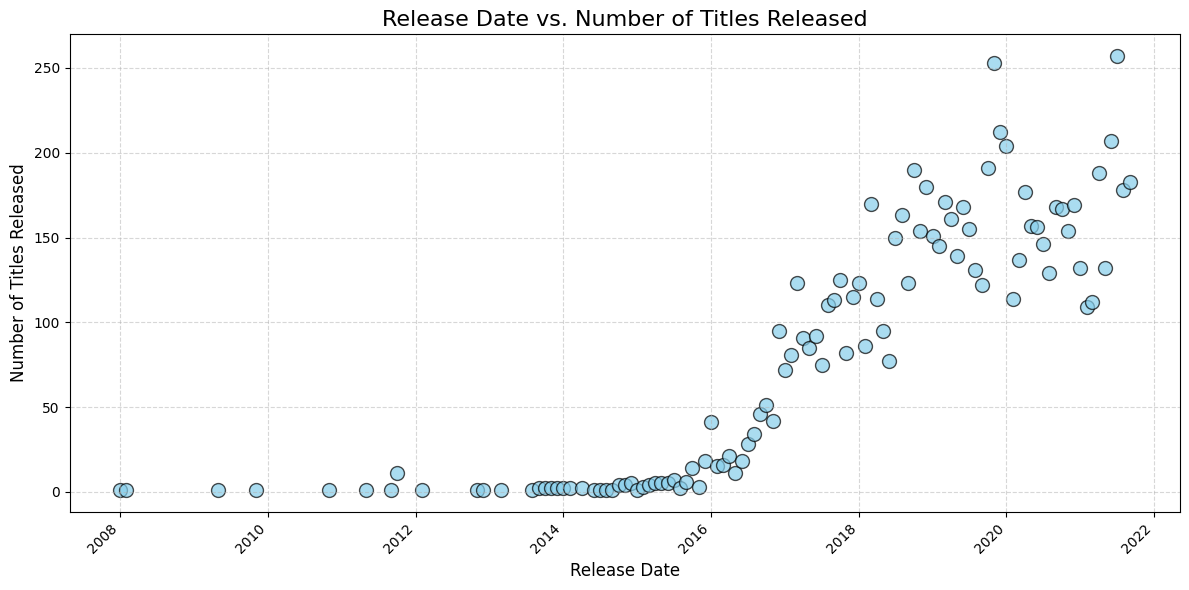

In [ ]:
monthly_counts = df.groupby(df['date_added'].dt.to_period('M'))['show_id'].count().reset_index()
monthly_counts['date_added'] = monthly_counts['date_added'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.scatter(monthly_counts['date_added'], monthly_counts['show_id'],
            color='skyblue', alpha=0.7, s=100, edgecolors='black')
plt.title('Release Date vs. Number of Titles Released', fontsize=16)
plt.xlabel('Release Date', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()